<h1 align="center">Lab 5</h1>

<h2>Imports and Stuff</h2>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import copy
import math
from skimage import morphology
from skimage.color import rgb2gray
from PIL import Image

#By default, an image is a float image
def displayImage(images, nrows = 1, ncols=1, title=[],image_max=0,plotsize=10):
    #Handle the case of 1 image
    if nrows == 1 and ncols == 1:
        images = [images]
    #Mismatch
    if len(images) != nrows*ncols:
        print("Number of images != number of subplots")
        return
    #Title mismathc
    if len(images) != len(title) and len(title)!=0:
        print("Number of images != number of titles")
        return
    fig = plt.figure(figsize=(plotsize,plotsize))
    ax = []
    for i in range(1, ncols*nrows +1):
        image = images[i-1]
        
        #Deal for various types
        type = image.dtype
        if np.issubdtype(type, np.integer):
            if image_max==0:
                im_max = np.iinfo(type).max
            else:
                im_max=copy.deepcopy(image_max)
        else:
            im_max = 1
        
        plt.gray()
        ax.append( fig.add_subplot(nrows, ncols,i))
        if len(title)!=0:
            ax[-1].set_title(title[i-1])
        plt.axis("off")
        plt.imshow(image,vmin=0,vmax=im_max)
    plt.show()
    
#Convert float to uint8
def im2int8(image):
    image = image.astype(np.float32)
    image = 255 * image
    image = image.astype(np.uint8)
    return image

#Converts an image to float32
def im2float32(image):
    type = image.dtype
    if np.issubdtype(type, np.integer):
        info = np.iinfo(image.dtype)
        image = image.astype(np.float32) / info.max
    return image


<h2>Lab Questions</h2>

<b>Question 1: </b>Given image ‘left’, apply appropriate morphological operators to eliminate the smaller squares.

B

[[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]]


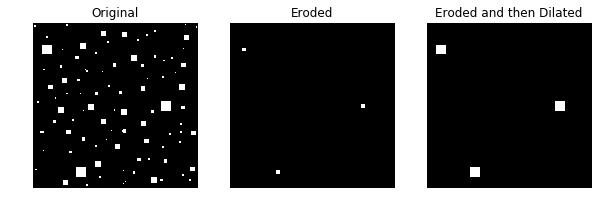

In [17]:
left = plt.imread("left.tif")

B = np.ones((13,13))
print("B\n")
print(B)

left_erode = morphology.binary_erosion(left,B)
left_erode_dilate = morphology.binary_dilation(left_erode,B)

displayImage([left,left_erode,left_erode_dilate],1,3,title=["Original","Eroded","Eroded and then Dilated"])

<b>Question 2: </b>Given image ‘wirebond-mask’, how would you extract the large square in the middle?

Erode and then dilate

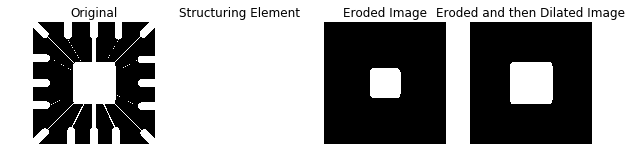

In [20]:
wirebond = Image.open("wirebond-mask.tif") # open colour image
wirebond = np.asarray(wirebond)

B = np.ones((50,50)).astype(np.bool)

wirebond2 = morphology.binary_erosion(wirebond,B)
wirebond3 = morphology.binary_dilation(wirebond2,B)

displayImage([wirebond,B,wirebond2,wirebond3],1,4,title=["Original","Structuring Element","Eroded Image","Eroded and then Dilated Image"])

<b>Question 3: </b>Apply opening and closing to image ‘phantom’ using different structuring elements and analyze the difference.

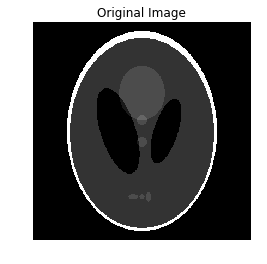

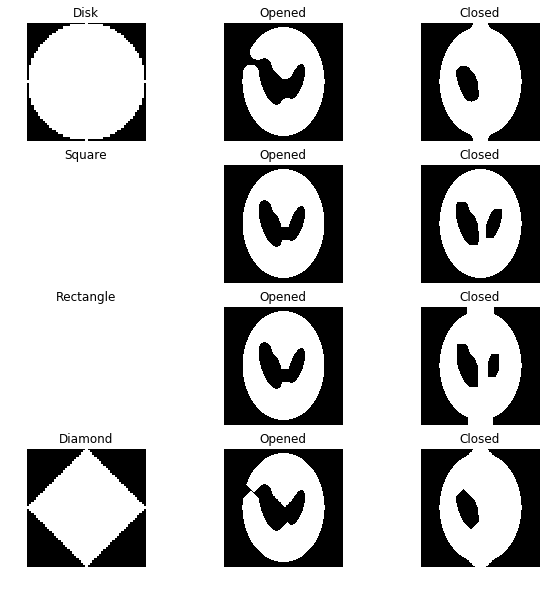

In [27]:
phantom = Image.open("phantom.png") # open colour image
phantom = np.asarray(phantom)
phantom = rgb2gray(phantom)

mySize = 26

Bdisk = morphology.disk(mySize).astype(np.bool)
Bsquare = morphology.square(mySize).astype(np.bool)
Brectangle = morphology.rectangle(mySize*2,mySize).astype(np.bool)
Bdiamond = morphology.diamond(mySize).astype(np.bool)

phantom2 = morphology.binary_opening(phantom,Bdisk)
phantom2_ = morphology.binary_closing(phantom,Bdisk)

phantom3 = morphology.binary_opening(phantom,Bsquare)
phantom3_ = morphology.binary_closing(phantom,Bsquare)

phantom4 = morphology.binary_opening(phantom,Brectangle)
phantom4_ = morphology.binary_closing(phantom,Brectangle)

phantom5 = morphology.binary_opening(phantom,Bdiamond)
phantom5_ = morphology.binary_closing(phantom,Bdiamond)

displayImage(phantom,title=["Original Image"],plotsize=4)
images = [Bdisk,phantom2,phantom2_,Bsquare,phantom3,phantom3_,Brectangle,phantom4,phantom4_,Bdiamond,phantom5,phantom5_]
titles = ["Disk","Opened","Closed","Square","Opened","Closed","Rectangle","Opened","Closed","Diamond","Opened","Closed",]
displayImage(images,4,3,title=titles)

<b>Question 4: </b>Extract the boundary of image ‘lincoln’ using morphological operators.

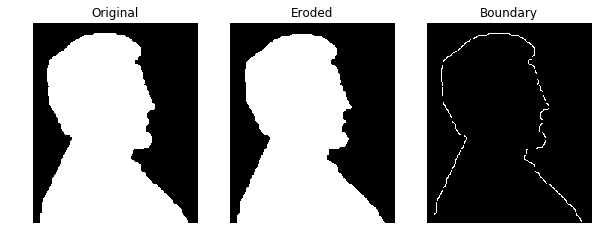

In [29]:
lincoln = Image.open("lincoln.tif") # open colour image
lincoln = np.asarray(lincoln)
lincoln = rgb2gray(lincoln)

B = np.ones((3,3))

lincoln2 = morphology.binary_erosion(lincoln,B)
lincoln3 = lincoln^lincoln2

displayImage([lincoln,lincoln2,lincoln3],1,3,title=["Original","Eroded","Boundary"])

<b>Question 5: </b>Extract the skeleton of image ‘leg_bone’.

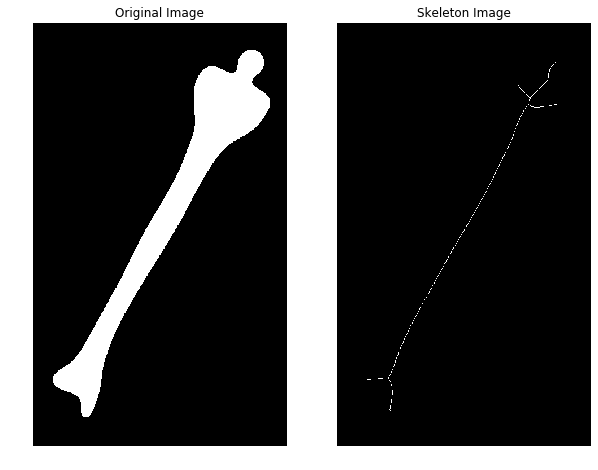

In [32]:
bone = Image.open("leg_bone.tif") # open colour image
bone = np.asarray(bone)
bone = rgb2gray(bone)
skeleton = morphology.skeletonize(bone)

displayImage([bone,skeleton],1,2,title=["Original Image","Skeleton Image"])

<h2>Problems</h2>

<b>Question 1:</b> Find the opening and closing of the shapes given in Table 1, Figures 1 and 2 by the corresponding structuringelements. Note that the origins of the structuring elements in Figures 1 and 2 are in the center.

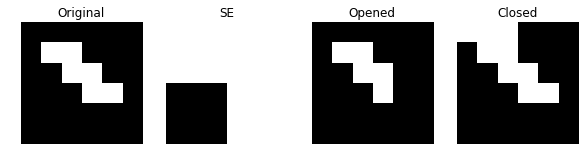

In [11]:
table = np.array([[0,0,0,0,0,0],[0,1,1,0,0,0],[0,0,1,1,0,0],[0,0,0,1,1,0],[0,0,0,0,0,0],[0,0,0,0,0,0]]).astype(np.bool)
SE = np.array([[1,1],[0,1]]).astype(np.bool)

table1open = morphology.binary_opening(table,SE)
table1closed = morphology.binary_closing(table,SE)
displayImage([table,SE,table1open,table1closed],1,4,title=["Original","SE","Opened","Closed"])